In [20]:
import pandas as pd
import matplotlib.pyplot as plt

enrol = pd.read_csv("../cleaned/enrolment_clean_final.csv")
demo  = pd.read_csv("../cleaned/demographic_clean_final.csv")
bio   = pd.read_csv("../cleaned/biometric_clean_final.csv")


In [21]:
enrol.shape, demo.shape, bio.shape

((983072, 12), (1597771, 10), (1765772, 9))

In [22]:
enrol_state = enrol.groupby('state')['total_enrolment'].sum()
demo_state  = demo.groupby('state')['total_demo_updates'].sum()
bio_state   = bio.groupby('state')['total_bio_attempts'].sum()

In [23]:
combined = combined[combined.index != '100000']

In [24]:
combined = combined[~combined.index.str.isnumeric()]


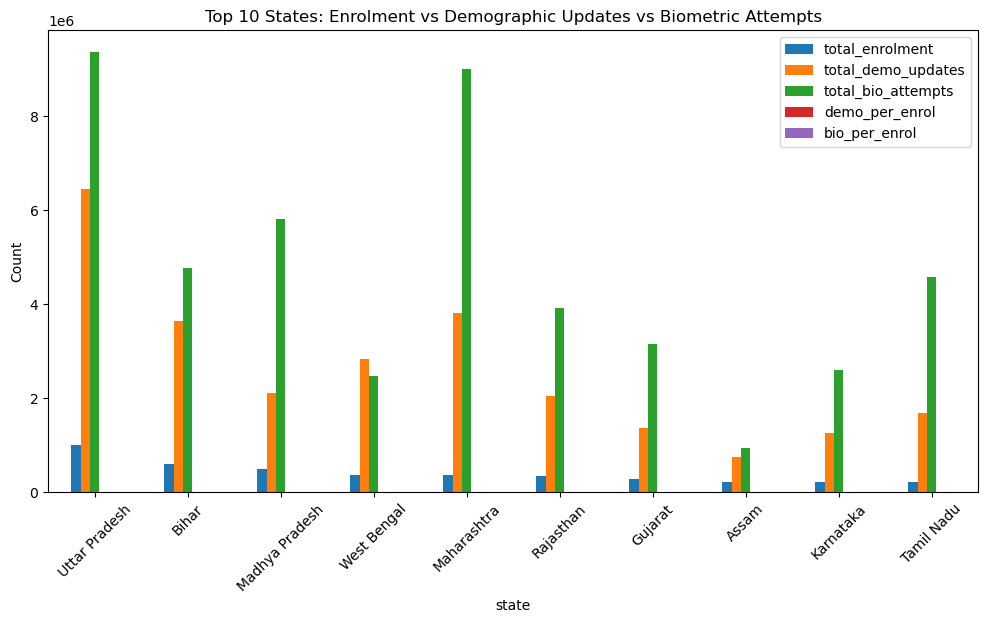

In [25]:
top_states = combined.sort_values(
    'total_enrolment', ascending=False
).head(10)

top_states.plot(
    kind='bar', figsize=(12,6)
)
plt.title('Top 10 States: Enrolment vs Demographic Updates vs Biometric Attempts')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


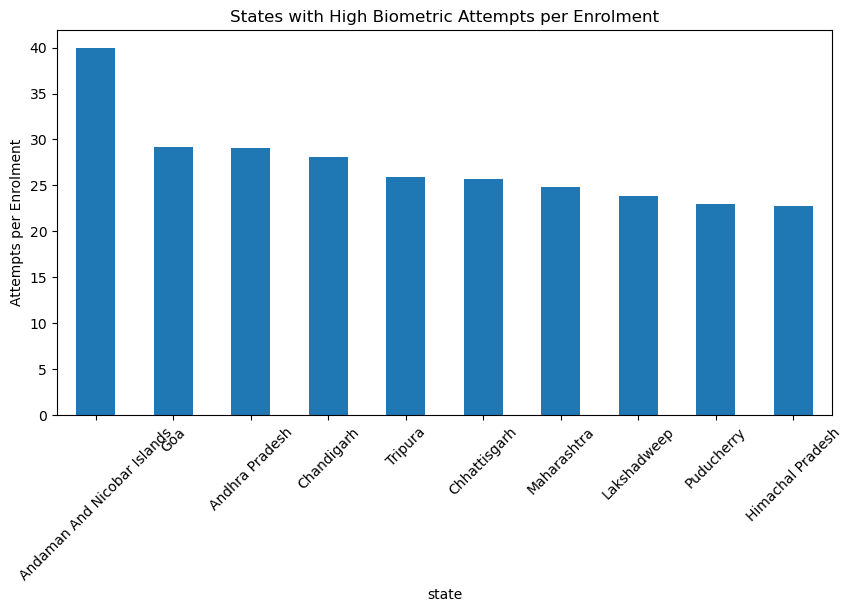

In [26]:
combined.sort_values(
    'bio_per_enrol', ascending=False
).head(10)['bio_per_enrol'].plot(
    kind='bar', figsize=(10,5),
    title='States with High Biometric Attempts per Enrolment'
)
plt.ylabel('Attempts per Enrolment')
plt.xticks(rotation=45)
plt.show()


High enrolment states also show high biometric activity, but the proportional relationship varies across states, indicating differences in post-enrolment usage and update behaviour.

Smaller states and union territories exhibit higher biometric attempts per enrolment, suggesting higher relative service dependency or limited alternative authentication mechanisms.

In [27]:
combined = combined[~combined.index.str.isnumeric()]


In [28]:
combined['demo_per_enrol'] = (
    combined['total_demo_updates'] / combined['total_enrolment']
)

combined['bio_per_enrol'] = (
    combined['total_bio_attempts'] / combined['total_enrolment']
)


In [29]:
summary = summary[~summary.index.str.isnumeric()]


In [30]:
combined = combined[~combined.index.str.isnumeric()]


In [31]:
summary = combined.copy()
summary['risk_flag'] = summary['bio_per_enrol'].apply(
    lambda x: 'High' if x > summary['bio_per_enrol'].mean() else 'Normal'
)
summary.head()


,total_enrolment,total_demo_updates,total_bio_attempts,demo_per_enrol,bio_per_enrol,risk_flag
state,,,,,,
Andaman And Nicobar Islands,501,5228.0,19994.0,10.435130,39.908184,High
Andhra Pradesh,124273,1642142.0,3610776.0,13.213989,29.055193,High
Arunachal Pradesh,4240,28391.0,70059.0,6.695991,16.523349,Normal
Assam,225359,755097.0,945150.0,3.350641,4.193975,Normal
Bihar,593753,3638844.0,4778968.0,6.128548,8.048748,Normal


## Final Conclusion

This integrated analysis combines enrolment, demographic, and biometric datasets
to examine the complete Aadhaar lifecycle across Indian states.

The results show that enrolment volume alone does not determine operational load.
Several states and union territories exhibit significantly higher biometric attempts
per enrolment, indicating greater relative dependency on Aadhaar authentication services.

Demographic update intensity also varies independently of enrolment size,
suggesting differences in post-enrolment profile stability across regions.

The risk classification highlights regions where biometric usage exceeds the national average,
indicating potential infrastructure and service capacity pressure.
These findings emphasize the need for region-specific planning and adaptive service strategies
rather than uniform implementation.

Overall, the analysis demonstrates that meaningful insights emerge only when
multiple datasets are studied together, providing a more accurate picture
of Aadhaar usage patterns and operational demands.
